In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import shapiro

In [8]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
# Shapiro test on Glucose column
shapiro_test = stats.shapiro(df["Glucose"])
print("Shapiro-Wilk p-value:", shapiro_test.pvalue)

Shapiro-Wilk p-value: 1.9867612763291298e-11


In [13]:
if shapiro_test.pvalue < 0.05:
    print("The data likely does not follow a normal distribution.")
else:
    print("The data may be normally distributed, but the q-q plot provide further insights.")

The data likely does not follow a normal distribution.


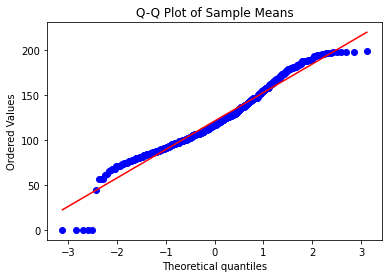

In [16]:
# Generate a Q-Q Plot for the sample means
stats.probplot(df["Glucose"], dist = "norm", plot = plt)
plt.title("Q-Q Plot of Sample Means")
plt.show()

In [17]:
# Central Limit Theorem
sample_means = []
n_samples = 100
sample_size = 30

In [19]:
for _ in range(n_samples):
    sample = df["Glucose"].sample(n=sample_size, replace = True)
    sample_means.append(sample.mean())

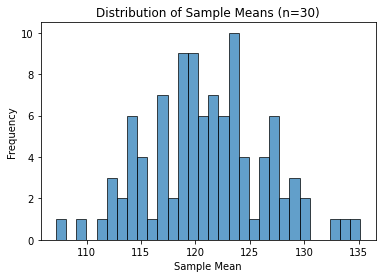

In [21]:
# Plot the distribution of sample means
plt.hist(sample_means, bins = 30, edgecolor = 'k', alpha = 0.7)
plt.title('Distribution of Sample Means (n=30)')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.show()

In [23]:
# Perfrom the Shapiro-Wilk test on the sample means
shapiro_test = stats.shapiro(sample_means)
print("Shapior-Wilk p-value:", shapiro_test.pvalue)

Shapior-Wilk p-value: 0.9458902478218079


In [24]:
# Interpret the result
if shapiro_test.pvalue < 0.05:
    print("The data likely does not follow a normal distribution.")
else:
    print("The data may be normally distributed, but the q-q plot provide further insights.")

The data may be normally distributed, but the q-q plot provide further insights.
